# Defiance Mk. IV - University of Toronto Aerospace - 2024
Launched in Launch Canada 2024. Defiance Mk. IV is the fourth rocket in the defiance series of hybrid rocket from University of Toronto Aerospace Team.

Defiance Mk. IV set a new Canadian amateur rocketry record with a recorded apogee altitude of $9308.318 m$.

With a relative error of only $0.76$%, the simulated apogee was of $9238.009 m$.

## Importing necessary modules

In [1]:
import datetime

from rocketpy import Environment, Flight, Function, Rocket
from rocketpy.motors import CylindricalTank, Fluid, HybridMotor
from rocketpy.motors.tank import MassFlowRateBasedTank

## Creating the simulation Environment


Gravity Details

Acceleration of gravity at surface level:    9.8046 m/s²
Acceleration of gravity at  80.000 km (ASL): 9.5667 m/s²


Launch Site Details

Launch Date: 2024-08-24 00:00:00 UTC
Launch Site Latitude: 47.96653°
Launch Site Longitude: -81.87413°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 434751.92 W    5312949.55 N
Launch Site UTM zone: 17T
Launch Site Surface Elevation: 1383.4 m


Atmospheric Model Details

Atmospheric Model Type: custom_atmosphere
custom_atmosphere Maximum Height: 80.000 km

Surface Atmospheric Conditions

Surface Wind Speed: 3.07 m/s
Surface Wind Direction: 109.03°
Surface Wind Heading: 289.03°
Surface Pressure: 857.70 hPa
Surface Temperature: 279.17 K
Surface Air Density: 1.070 kg/m³
Surface Speed of Sound: 334.62 m/s


Earth Model Details

Earth Radius at Launch site: 6366.38 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034


Atmospheric Model Plots



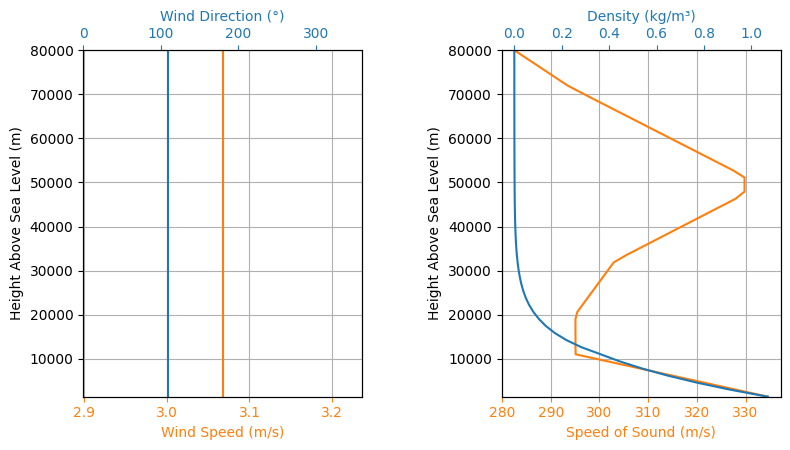

In [2]:
flight_date = datetime.date(2024, 8, 24)
env = Environment(latitude=47.966527, longitude=-81.87413, elevation=1383.4)

env.set_date((flight_date.year, flight_date.month, flight_date.day, 0))
env.set_atmospheric_model(type="custom_atmosphere", wind_v=1.0, wind_u=-2.9)

env.info()

## Building the Hybrid Motor

In [3]:
oxidizer_liq = Fluid(name="N2O_l", density=960)
oxidizer_gas = Fluid(name="N2O_g", density=1.9277)

tank_shape = CylindricalTank(0.0665, 1.79)

oxidizer_tank = MassFlowRateBasedTank(
    name="oxidizer_tank",
    geometry=tank_shape,
    flux_time=(6.5),
    liquid=oxidizer_liq,
    gas=oxidizer_gas,
    initial_liquid_mass=17,
    initial_gas_mass=0,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out=17 / 6.5,
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=0,
)

""" Defining the thrust curve"""


def thrust_fuction(t):
    return 5750 * 2 ** (-t / 200)


hybrid_motor = HybridMotor(
    thrust_source="../../data/rockets/defiance/Thrust_curve.csv",
    dry_mass=13.832,
    dry_inertia=(1.801, 1.801, 0.0305),
    center_of_dry_mass_position=780 / 1000,
    reshape_thrust_curve=False,
    grain_number=1,
    grain_separation=0,
    grain_outer_radius=0.0665,
    grain_initial_inner_radius=0.061,
    grain_initial_height=1.25,
    grain_density=920,
    nozzle_radius=0.0447,
    throat_radius=0.0234,
    interpolation_method="linear",
    grains_center_of_mass_position=0.377,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

hybrid_motor.add_tank(tank=oxidizer_tank, position=2.2)

## Building the Rocket and adding Aero surfaces

In [4]:
defiance = Rocket(
    radius=0.07,
    mass=37.211,
    # inertia = (180.142, 180.142, 0.262),
    inertia=(94.14, 94.14, 0.09),
    center_of_mass_without_motor=3.29,
    power_off_drag="../../data/rockets/defiance/DragCurve.csv",
    power_on_drag="../../data/rockets/defiance/DragCurve.csv",
    coordinate_system_orientation="tail_to_nose",
)

defiance.add_motor(hybrid_motor, position=0.2)

defiance.add_nose(length=0.563, kind="vonKarman", position=4.947)

defiance.add_trapezoidal_fins(
    n=3, span=0.115, root_chord=0.4, tip_chord=0.2, position=0.175
)

defiance.add_tail(top_radius=0.07, bottom_radius=0.064, length=0.0597, position=0.1)

defiance.add_parachute(name="main", cd_s=2.2, trigger=305, sampling_rate=100, lag=0)

defiance.add_parachute(
    name="drogue", cd_s=1.55, trigger="apogee", sampling_rate=100, lag=0
)

<Parachute drogue (cd_s = 1.5500 m2, trigger = apogee)>

## Flight Simulation


Apogee State

Apogee Time: 44.155 s
Apogee Altitude: 10621.409 m (ASL) | 9238.009 m (AGL)
Apogee Freestream Speed: 51.397 m/s
Apogee X position: 2291.300 m
Apogee Y position: -190.030 m
Apogee latitude: 47.9648127°
Apogee longitude: -81.8433333°


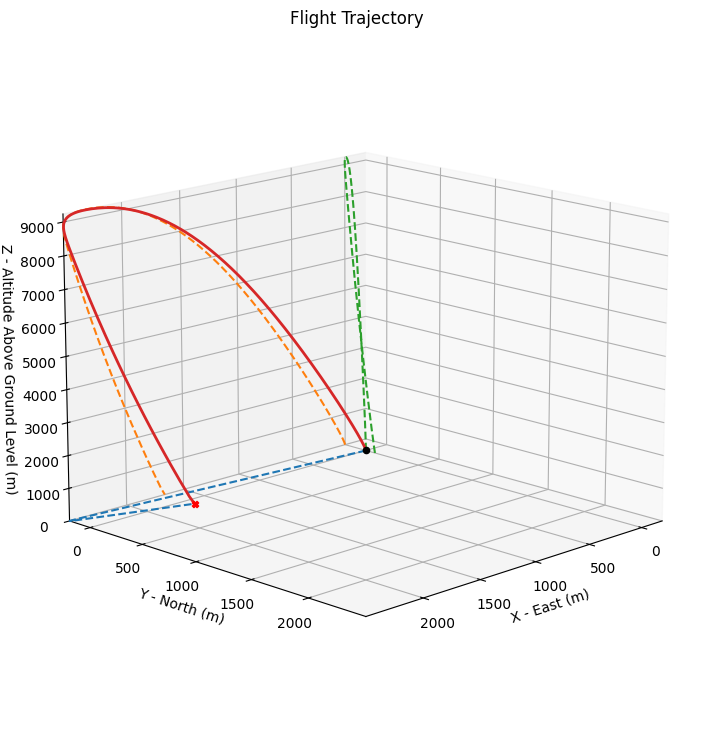

In [5]:
test_flight = Flight(
    rocket=defiance, environment=env, inclination=85, heading=90, rail_length=10
)

test_flight.prints.apogee_conditions()
test_flight.plots.trajectory_3d()